In [4]:
from pyslise import PySE2d, PySlise, PySliseHalf
import numpy as np

c = 10^3
a = -1
def V(x, y):
    return x**2 + y**2 + c * (x**4 + 2 * a * x**2 * y**2 + y**4)

M = 2
N = 40
p = PySE2d(V, -M,M, -M,M,
           x_tolerance=1e-9, y_tolerance=1e-3,
           symmetric=True, N=N, grid_points=120)

In [2]:
p.eigenvalue(17)

nan

In [3]:
sectors = p.__sectors
p1d = PySliseHalf(lambda x: V(x, (sectors[0].min+sectors[0].max)/2), M, tolerance=1e-8)

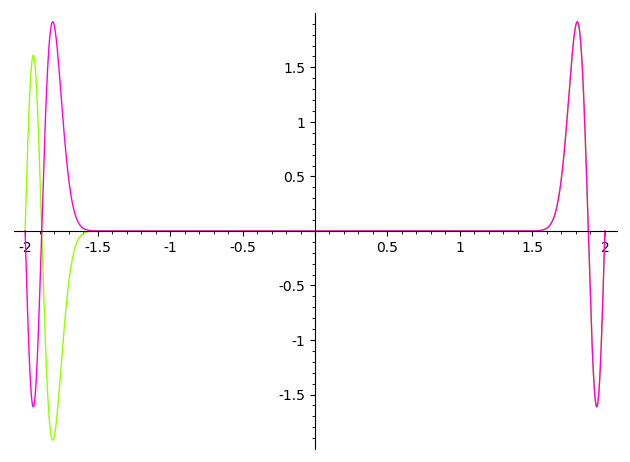

In [4]:
Es = p1d.eigenvaluesByIndex(2,4, [0,1])
g = Graphics()
for i, E in Es:
    f = p1d.eigenfunction(E, [0,1], i%2 == 0)
    g += plot(lambda x: f(x)[0], (-M, M), color=hue(i*golden_ratio))
g.show()

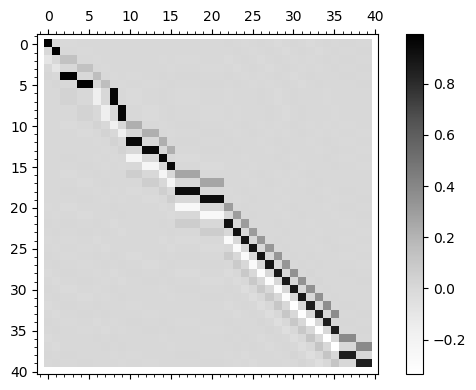

In [23]:
matrix_plot(p.__M[0], colorbar=True)

In [34]:
for s in p.__sectors:
    print s.max-s.min

0.04
0.0827611062812
0.0827611062812
0.0882416488773
0.0882416488773
0.0939472228792
0.0939472228792
0.0999602314905
0.0999602314905
0.10620365232
0.10620365232
0.112674038641
0.112674038641
0.119763664037
0.119763664037
0.127968511177
0.127968511177
0.127968511177
0.136340405966
0.136340405966
0.136340405966
0.14504684305
0.14504684305
0.15368360289
0.15368360289
0.163779782171
0.163779782171
0.177661686818
0.192409735414
0.210942632645
0.247805275028
0.0139071566893
0.247633285517
0.210816414795
0.19232163516
0.177602130848
0.163740462847
0.163740462847
0.153653593003
0.153653593003
0.145020604823
0.145020604823
0.136313954221
0.136313954221
0.136313954221
0.127937370379
0.127937370379
0.127937370379
0.119733407449
0.119733407449
0.112643886626
0.112643886626
0.106169605609
0.106169605609
0.0999173080111
0.0999173080111
0.0938884729842
0.0938884729842
0.0881547159863
0.0881547159863
0.0826258109531
0.0826258109531
0.04


In [54]:
 (sectors[0].min+sectors[0].max)/2

-3.98

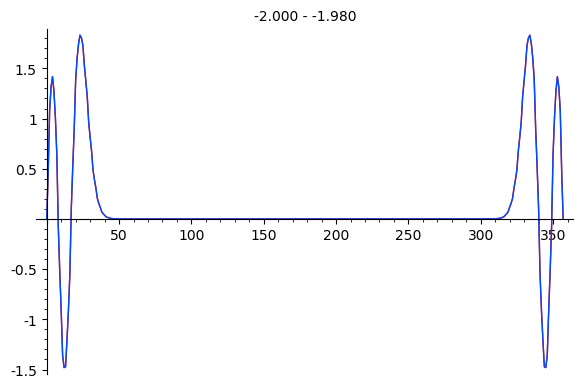

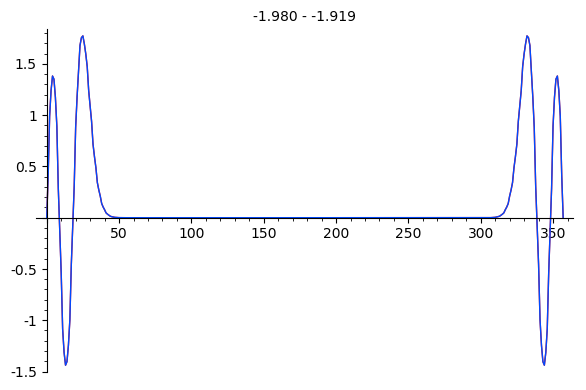

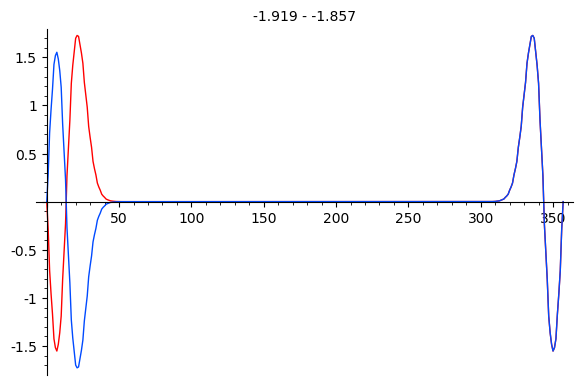

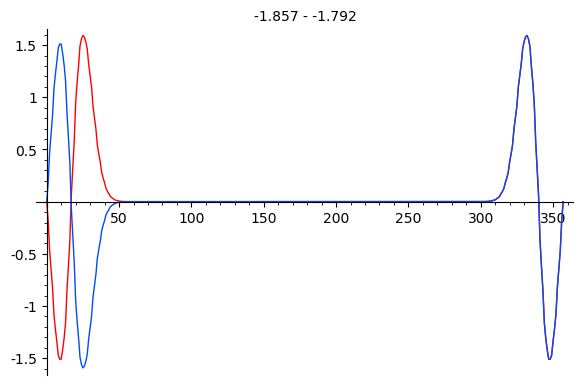

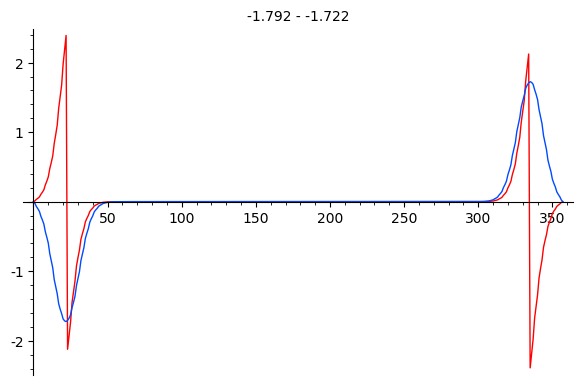

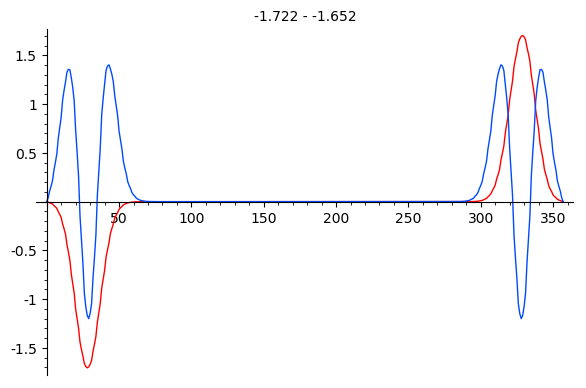

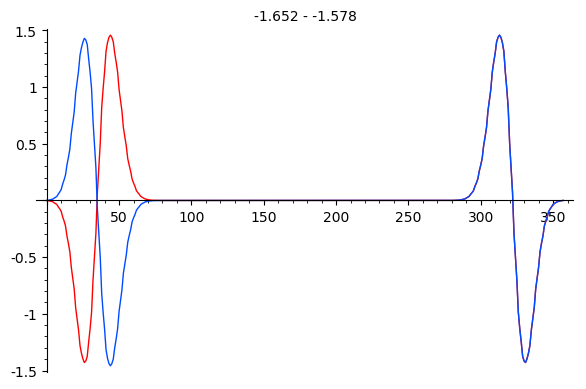

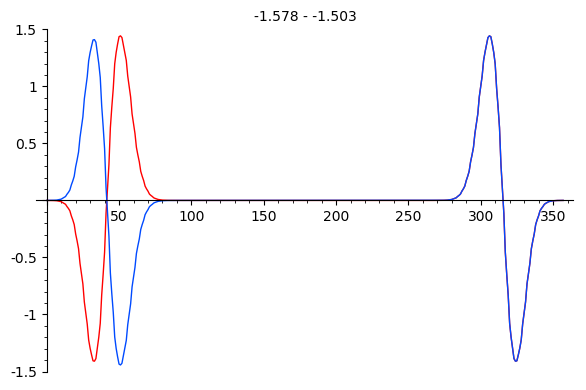

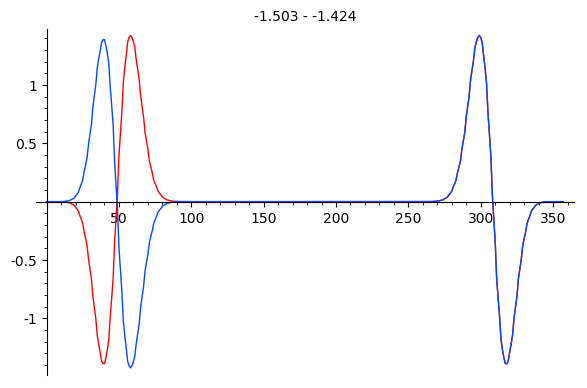

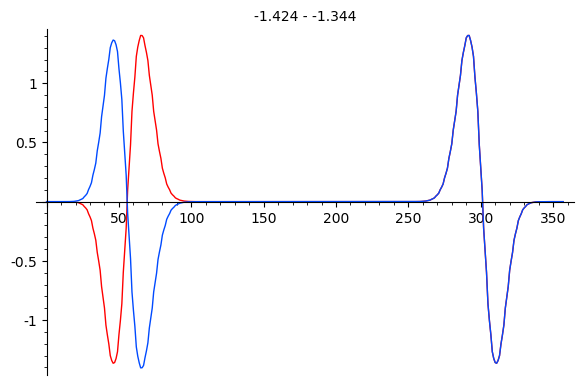

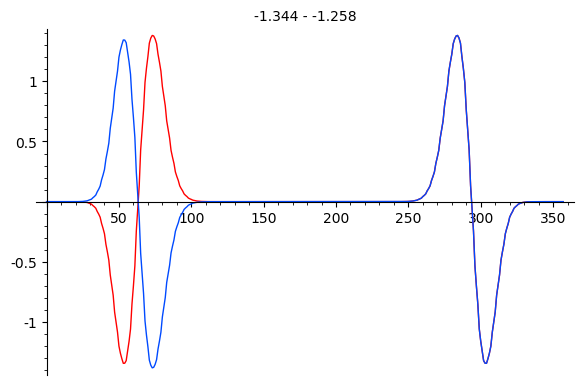

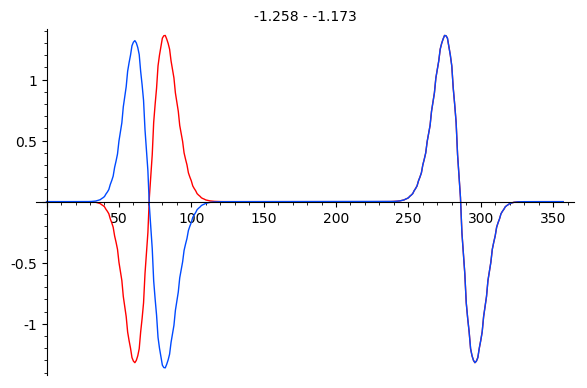

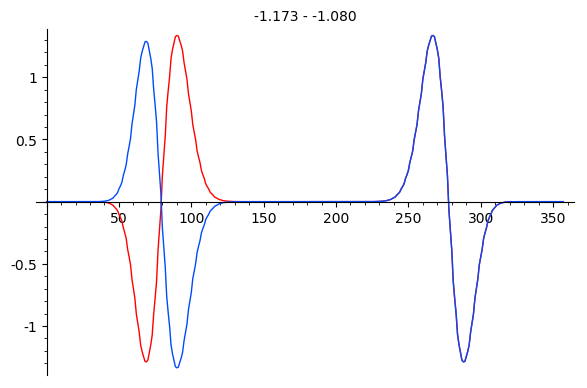

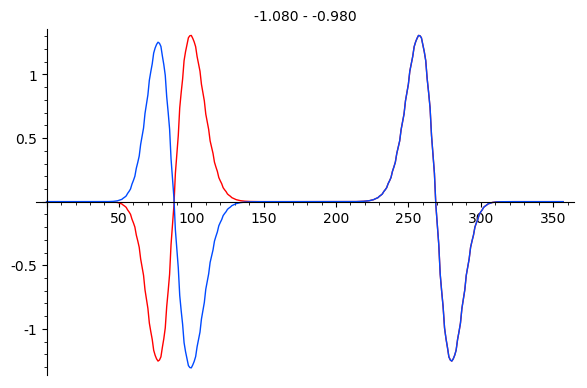

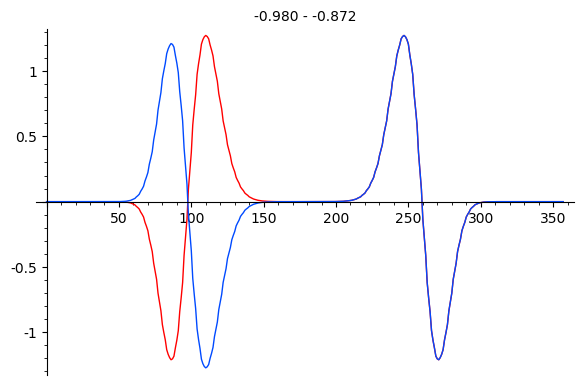

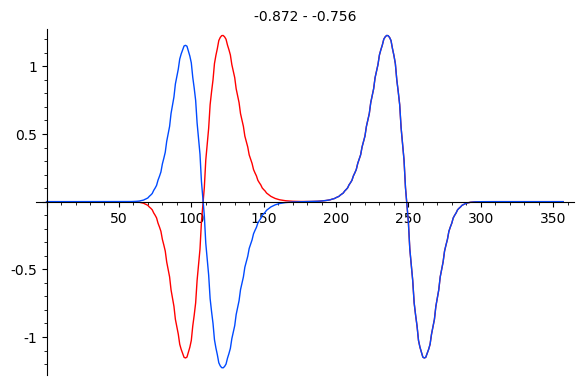

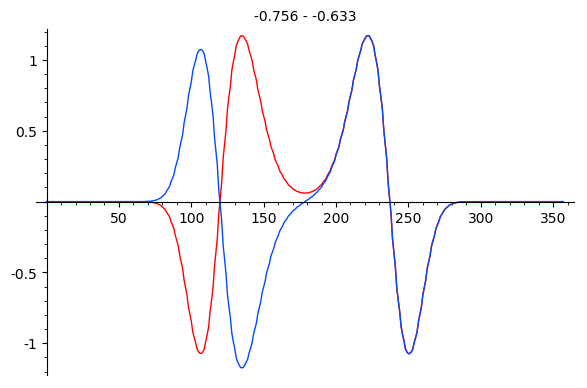

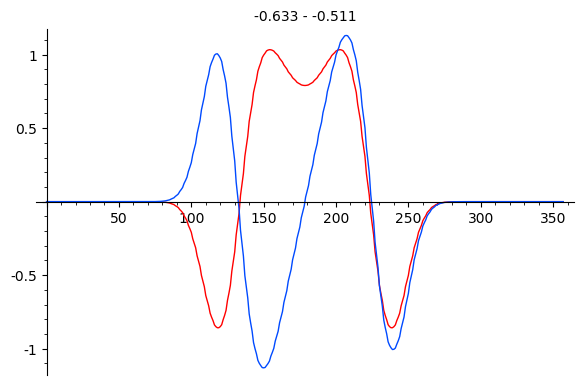

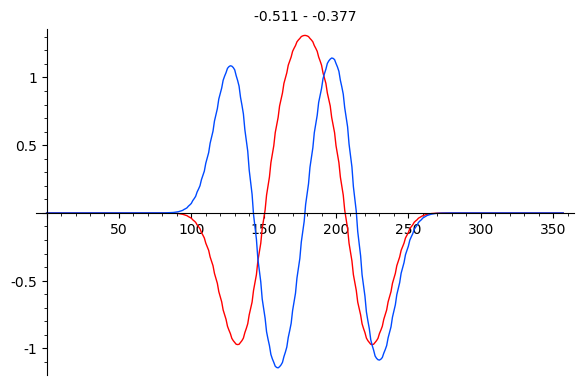

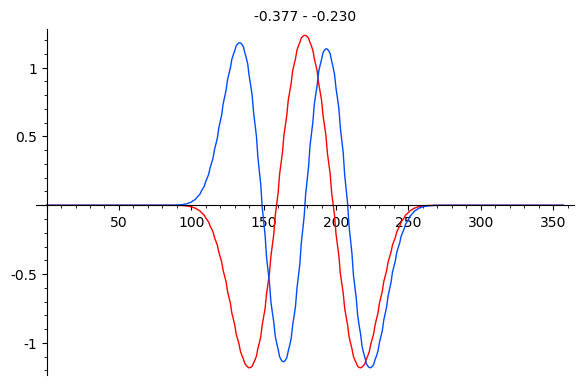

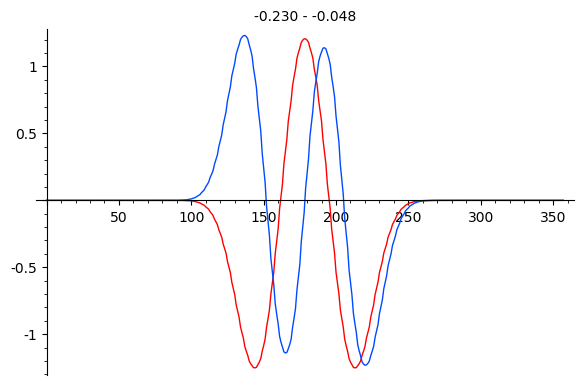

In [5]:
sectors = p.__sectors
for j in range(len(sectors)/2):
    sum([
        list_plot(f, color=hue(i*golden_ratio),
                 plotjoined=True)
        for i, f in enumerate(sectors[j].eigenfunctions[2:4])
    ]).show(title="%.3f - %.3f"%(sectors[j].min, sectors[j].max))